In [1]:
boston_df = read.csv('/home/jovyan/Project3/data/bostonhousing.csv', header=FALSE, sep='')

colnames(boston_df) = c('crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black','lstat', 'medv')

In [3]:
dim(boston_df)

[1] 506  14

In [4]:
str(boston_df)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


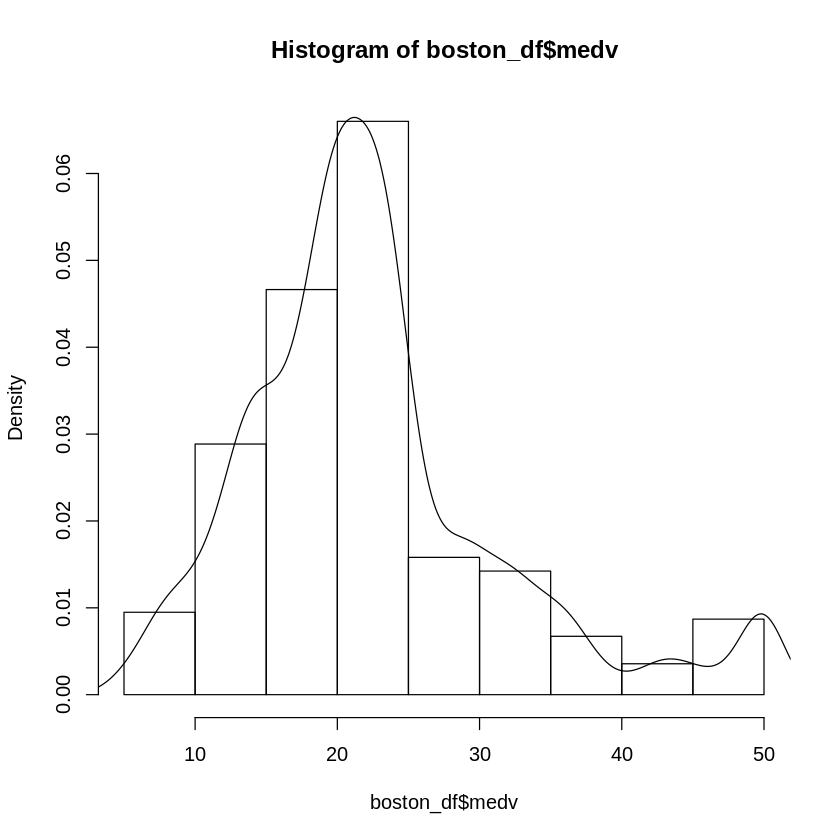

In [5]:
hist(boston_df$medv, freq = FALSE)
lines(density(boston_df$medv))

# Basic Stats

In [6]:
install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
library(moments)

In [8]:
skewness(boston_df)

crim         zn      indus       chas        nox         rm        age 
 5.2076524  2.2190631  0.2941463  3.3957993  0.7271442  0.4024147 -0.5971856 
       dis        rad        tax    ptratio      black      lstat       medv 
 1.0087788  1.0018335  0.6679683 -0.7999445 -2.8817983  0.9037707  1.1048108

In [9]:
stats = data.frame(feature=colnames(boston_df))
stats['mean_'] = sapply(boston_df, mean)
stats['sd_'] = sapply(boston_df, sd)
stats['skewness_'] = sapply(boston_df, skewness)
stats

feature,mean_,sd_,skewness_
crim,3.61352356,8.6015451,5.2076524
zn,11.36363636,23.3224530,2.2190631
indus,11.13677866,6.8603529,0.2941463
chas,0.06916996,0.2539940,3.3957993
nox,0.55469506,0.1158777,0.7271442
rm,6.28463439,0.7026171,0.4024147
age,68.57490119,28.1488614,-0.5971856
dis,3.79504269,2.1057101,1.0087788
rad,9.54940711,8.7072594,1.0018335
tax,408.23715415,168.5371161,0.6679683


# Sampling the Dataset

In [10]:
library(dplyr, warn.conflicts = FALSE)

In [11]:
set.seed(42)

In [12]:
sample_1 = sample_n(boston_df, 5)

In [13]:
colMeans(sample_1)

colMeans(sample_1) - stats$mean_ 

(colMeans(sample_1) - stats$mean_)/stats$sd_

crim         zn      indus       chas        nox         rm        age 
  8.074658   0.000000  16.252000   0.000000   0.674000   5.909000  77.480000 
       dis        rad        tax    ptratio      black      lstat       medv 
  2.596360  16.400000 537.600000  18.980000 338.548000  17.856000  18.380000

crim           zn        indus         chas          nox           rm 
  4.46113444 -11.36363636   5.11522134  -0.06916996   0.11930494  -0.37563439 
         age          dis          rad          tax      ptratio        black 
  8.90509881  -1.19868269   6.85059289 129.36284585   0.52446640 -18.12603162 
       lstat         medv 
  5.20293676  -4.15280632

crim         zn      indus       chas        nox         rm        age 
 0.5186434 -0.4872402  0.7456207 -0.2723291  1.0295766 -0.5346217  0.3163573 
       dis        rad        tax    ptratio      black      lstat       medv 
-0.5692534  0.7867680  0.7675629  0.2422539 -0.1985438  0.7285943 -0.4515341

For a 90% confidence level and a 10% margin of error we need a sample size of 60 for this data set.![](Sample%20Size%20Calculator.PNG)


In [14]:
sample_2 = sample_n(boston_df, 60)

In [15]:
colMeans(sample_2)

crim           zn        indus         chas          nox           rm 
  2.86394117  13.07500000  10.65616667   0.01666667   0.55878500   6.44660000 
         age          dis          rad          tax      ptratio        black 
 65.34166667   3.94057333  11.06666667 428.75000000  18.57000000 354.71933333 
       lstat         medv 
 11.65500000  24.36666667

In [16]:
colMeans(sample_2) - stats$mean_

(colMeans(sample_2) - stats$mean_)/stats$sd_

crim           zn        indus         chas          nox           rm 
-0.749582391  1.711363636 -0.480611989 -0.052503294  0.004089941  0.161965613 
         age          dis          rad          tax      ptratio        black 
-3.233234519  0.145530646  1.517259552 20.512845850  0.114466403 -1.954698287 
       lstat         medv 
-0.998063241  1.833860343

crim          zn       indus        chas         nox          rm 
-0.08714509  0.07337837 -0.07005645 -0.20671073  0.03529533  0.23051759 
        age         dis         rad         tax     ptratio       black 
-0.11486200  0.06911238  0.17425225  0.12171115  0.05287265 -0.02141082 
      lstat        medv 
-0.13976399  0.19939541

# Repeatedly Sampling 

Sampling 6 times 10

In [17]:
sample_means = colMeans(sample_n(boston_df, 10))

for (i in 1:5) {
    sample_means = (sample_means*(i) + colMeans(sample_n(boston_df, 5)))/(i+1)
}

sample_means; stats

(sample_means-stats$mean_)/stats$sd_

crim           zn        indus         chas          nox           rm 
  2.82045633   7.70000000  10.17316667   0.03333333   0.55216667   6.18660000 
         age          dis          rad          tax      ptratio        black 
 64.98333333   3.52958000   8.21666667 384.28333333  17.90666667 375.53683333 
       lstat         medv 
 11.41666667  24.12333333

feature,mean_,sd_,skewness_
crim,3.61352356,8.6015451,5.2076524
zn,11.36363636,23.3224530,2.2190631
indus,11.13677866,6.8603529,0.2941463
chas,0.06916996,0.2539940,3.3957993
nox,0.55469506,0.1158777,0.7271442
rm,6.28463439,0.7026171,0.4024147
age,68.57490119,28.1488614,-0.5971856
dis,3.79504269,2.1057101,1.0087788
rad,9.54940711,8.7072594,1.0018335
tax,408.23715415,168.5371161,0.6679683


crim          zn       indus        chas         nox          rm 
-0.09220055 -0.15708624 -0.14046099 -0.14109239 -0.02181950 -0.13952746 
        age         dis         rad         tax     ptratio       black 
-0.12759194 -0.12606801 -0.15306084 -0.14212787 -0.25352459  0.20661405 
      lstat        medv 
-0.17313905  0.17293781

Sampling 6 times 10 returns a closer mean to the full data set thank sampling 60 once.

In [18]:
sample_means = colMeans(sample_n(boston_df, 5))

for (i in 1:49) {
    sample_means = (sample_means*(i) + colMeans(sample_n(boston_df, 5)))/(i+1)
}

(sample_means-stats$mean_)/stats$sd_

crim           zn        indus         chas          nox           rm 
-0.006955011 -0.005215419  0.050554446  0.058387352  0.018758926  0.041333481 
         age          dis          rad          tax      ptratio        black 
-0.019428892 -0.067591206  0.051289719  0.031202894 -0.049116061 -0.022448926 
       lstat         medv 
 0.009535943  0.087896545

In [19]:
boston_features = Filter(is.numeric, boston_df)

In [20]:
sum_vals = data.frame(feature=colnames(boston_features))
sum_vals['mean_'] = sapply(boston_features, mean)
sum_vals

feature,mean_
crim,3.61352356
zn,11.36363636
indus,11.13677866
chas,0.06916996
nox,0.55469506
rm,6.28463439
age,68.57490119
dis,3.79504269
rad,9.54940711
tax,408.23715415


The mean of the various samples is a lot closer the more samples we are taking.

In [21]:
library(dplyr, warn.conflicts = FALSE)
samples = list()
for (i in 1:10) {
    samples[[i]] = sample_n(boston_features, 5)
}

In [22]:
for (i in 1:10) {
    sum_vals[paste('mean_', i)] = sapply(samples[[i]], mean)
}

In [23]:
sum_vals

feature,mean_,mean_ 1,mean_ 2,mean_ 3,mean_ 4,mean_ 5,mean_ 6,mean_ 7,mean_ 8,mean_ 9,mean_ 10
crim,3.61352356,2.01029,3.033898,0.153678,1.493446,4.045754,2.420252,0.204034,9.969898,3.164362,2.66841
zn,11.36363636,21.00000,10.400000,18.000000,16.000000,4.200000,15.000000,6.800000,0.000000,11.000000,12.40000
indus,11.13677866,8.01400,7.896000,12.292000,12.604000,13.666000,13.308000,10.112000,10.902000,11.248000,10.88600
chas,0.06916996,0.20000,0.200000,0.200000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.20000
nox,0.55469506,0.49480,0.484400,0.517400,0.582200,0.592400,0.551200,0.497800,0.524200,0.628380,0.53460
rm,6.28463439,6.47900,6.428400,6.424200,6.054600,6.348600,6.182400,6.538800,5.806600,5.837000,6.19000
age,68.57490119,55.82000,56.820000,58.680000,62.340000,70.100000,79.360000,68.700000,53.680000,74.040000,50.34000
dis,3.79504269,3.77856,5.569120,3.908500,3.933880,3.531680,3.640820,3.920260,4.447580,3.063720,4.51100
rad,9.54940711,9.00000,9.600000,3.600000,7.800000,12.000000,8.000000,5.200000,11.400000,12.000000,12.80000
tax,408.23715415,355.60000,391.000000,412.600000,398.200000,442.200000,507.400000,311.000000,409.000000,466.400000,439.00000


No id variables; using all as measure variables


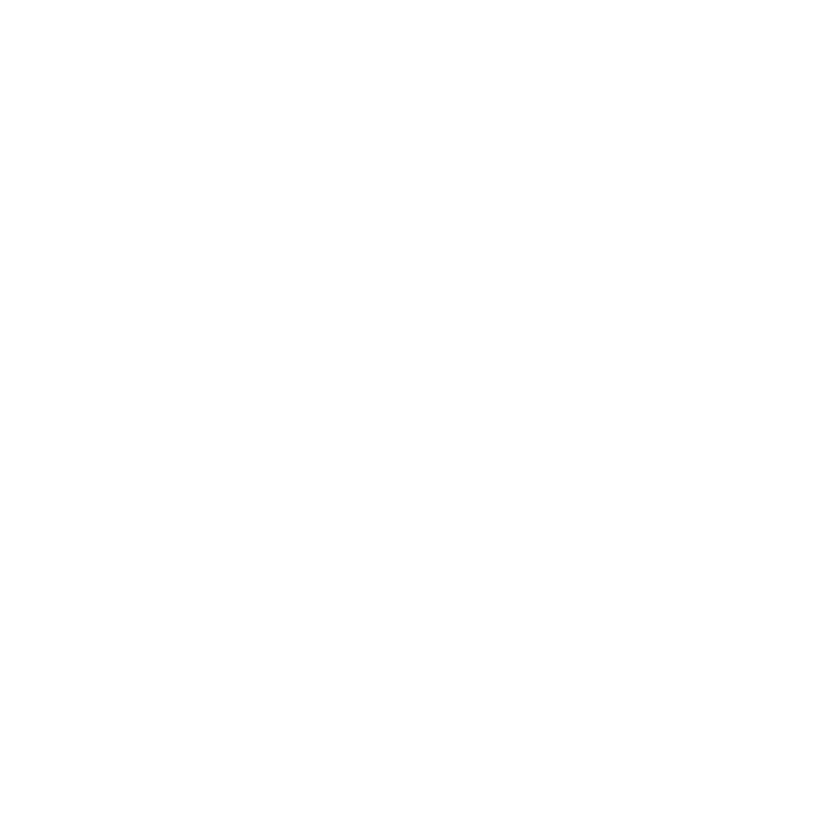

In [24]:
library(reshape2)
library(ggplot2)

ggplot(melt(boston_df), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

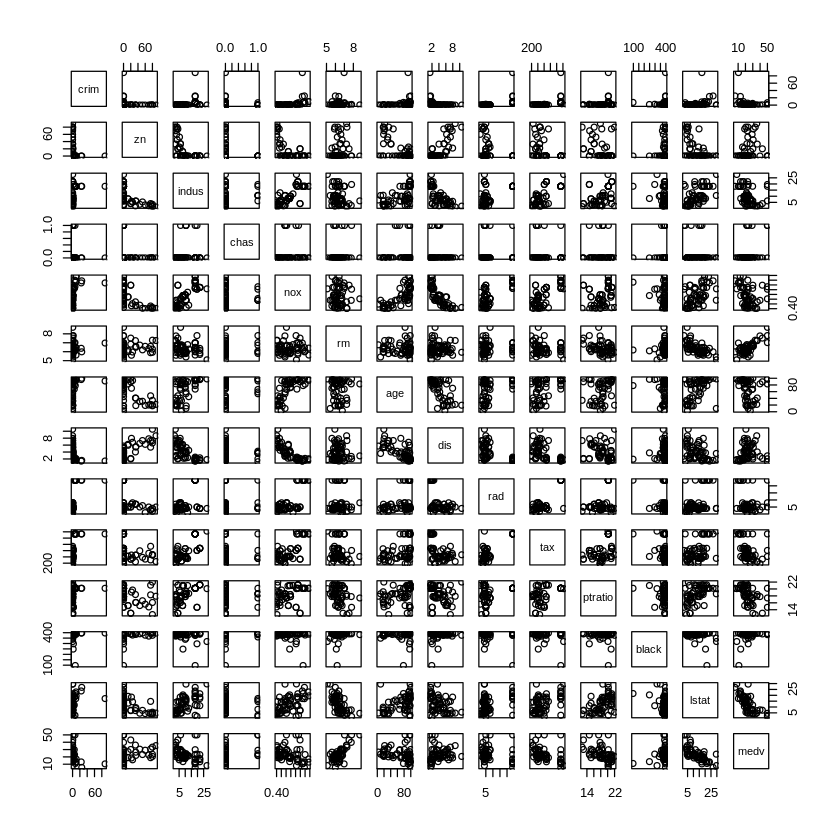

In [25]:
pairs(sample_n(boston_df, 60))

Strong negative correlation can be observed between the nitrogen oxide concentration and the weighted mean of distances to five Boston employment centres.
A stong positive correlation exists for average number of rooms and the median value of the homeas well as the lower status of the population and the median value of the home.